In [16]:

import xml.etree.ElementTree as ET
import os
import pickle
import xmltodict
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [17]:
import os
import cv2
import xml.etree.ElementTree as ET

# Define the paths to your image and annotation folders
path_image = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image"
path_annotations = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/annotation"

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file in the image folder
for image_filename in os.listdir(path_image):
    if image_filename.lower().endswith(".jpg"):  # Check for image files
        image_path = os.path.join(path_image, image_filename)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if image is not None:
            # Resize the image to 512x512 if needed
            if image.shape[0] >= 512 and image.shape[1] >= 512:
                image = cv2.resize(image, (512, 512))
            else:
                print(f"Image dimensions are too small for resizing: {image_path}")

            # Append the image to the list of images
            images.append(image)

            # Load the corresponding label (XML file)
            xml_filename = os.path.splitext(image_filename)[0] + ".xml"
            xml_path = os.path.join(path_annotations, xml_filename)

            # Check if the XML file exists
            if os.path.exists(xml_path):
                # Parse the XML file to extract the label (you may need to adjust this based on your XML structure)
                tree = ET.parse(xml_path)
                root = tree.getroot()

                # Find the "name" element and check if it exists
                name_element = root.find("object/name")
                if name_element is not None:
                    label = name_element.text  # Use .text to get the text content of the element
                    labels.append(label)
                else:
                    # Handle the case where the "name" element is missing
                    print(f"'name' element not found in XML file: {xml_path}")
            else:
                # Handle the case where the XML label file is missing
                print(f"XML label file not found for image: {image_path}")

# Now, you have loaded images and labels from your specified paths
# You can proceed to use them for your specific tasks.


Image dimensions are too small for resizing: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria195.jpg
Image dimensions are too small for resizing: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria156.jpg
Image dimensions are too small for resizing: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria630.jpg
Image dimensions are too small for resizing: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria624.jpg
Image dimensions are too small for resizing: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image/Pseudodiploria142.jpg
Image dimensions are

In [18]:
import numpy as np

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Now, check the shapes
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Images shape: (899, 224, 224, 3)
Labels shape: (899,)


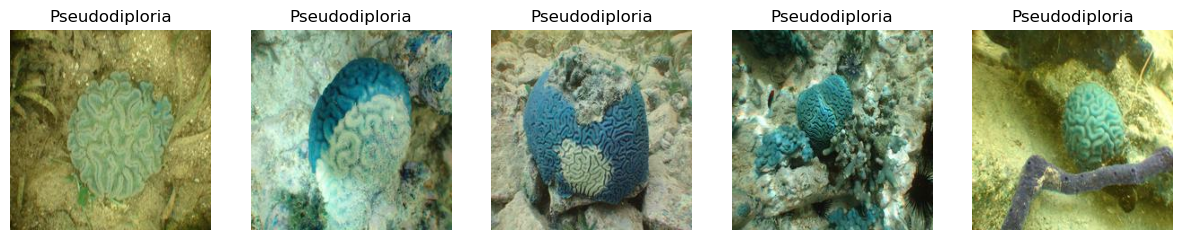

In [19]:
import matplotlib.pyplot as plt

# Define the number of samples to display
num_samples_to_display = 5

# Create subplots to display the images
plt.figure(figsize=(15, 5))

for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis("off")

plt.show()


In [20]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
# Check the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (719, 224, 224, 3)
y_train shape: (719,)
X_test shape: (180, 224, 224, 3)
y_test shape: (180,)


In [22]:
# Save your data to a pickle file
with open('../data/external/data.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test), f)

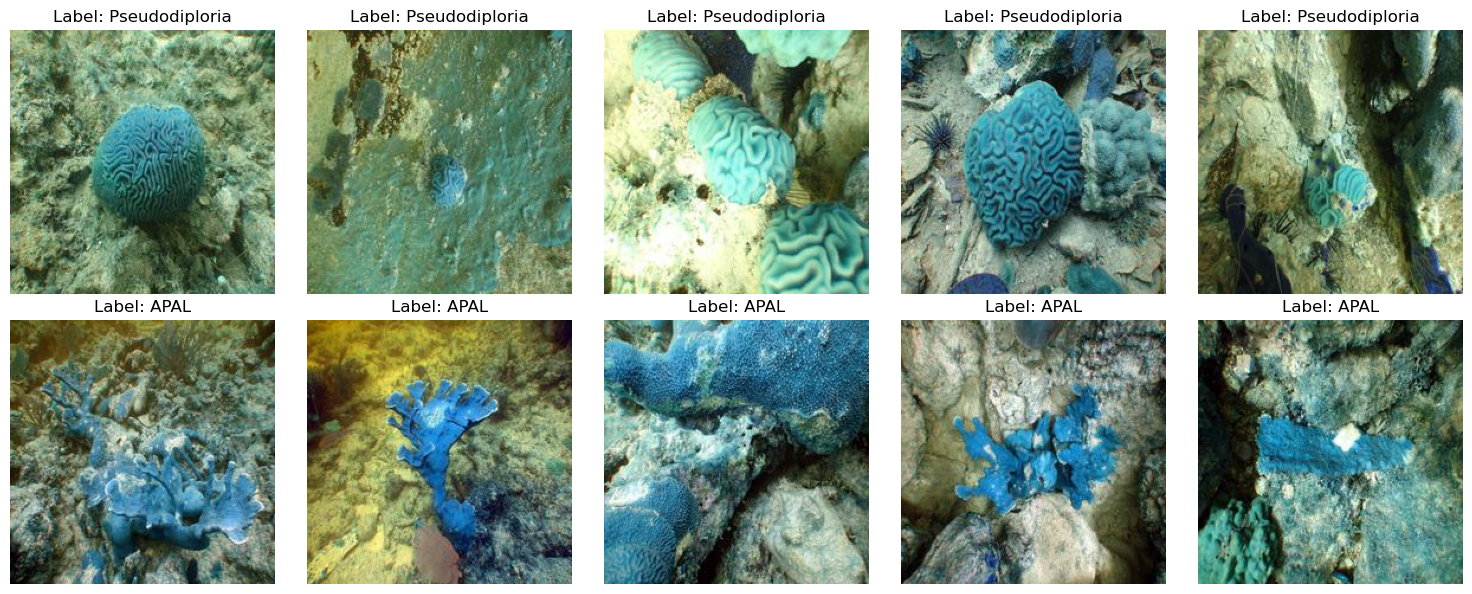

In [23]:
import random

# Define the number of rows and columns for the grid
num_rows = 2
num_columns = 5

# Define the target classes
target_classes = ["Pseudodiploria", "APAL"]

# Initialize variables to count how many images have been selected for each class
class_counts = {class_label: 0 for class_label in target_classes}

# Create subplots for displaying the selected images and labels
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6))
axes = axes.ravel()

for i, class_label in enumerate(target_classes):
    for j in range(num_columns):
        # Find the indices of all samples in the training set with the target class label
        class_indices = [idx for idx, label in enumerate(y_train) if label == class_label]
        
        # Shuffle the class_indices to randomly select images
        random.shuffle(class_indices)
        
        # Ensure we don't select more images than available
        if class_counts[class_label] < len(class_indices):
            # Get the index of the image to display
            selected_index = class_indices[class_counts[class_label]]
            
            # Display the selected image and label
            axes[i * num_columns + j].imshow(X_train[selected_index])
            axes[i * num_columns + j].set_title(f'Label: {class_label}')
            axes[i * num_columns + j].axis("off")
            
            # Increment the count for this class
            class_counts[class_label] += 1

plt.tight_layout()
plt.show()


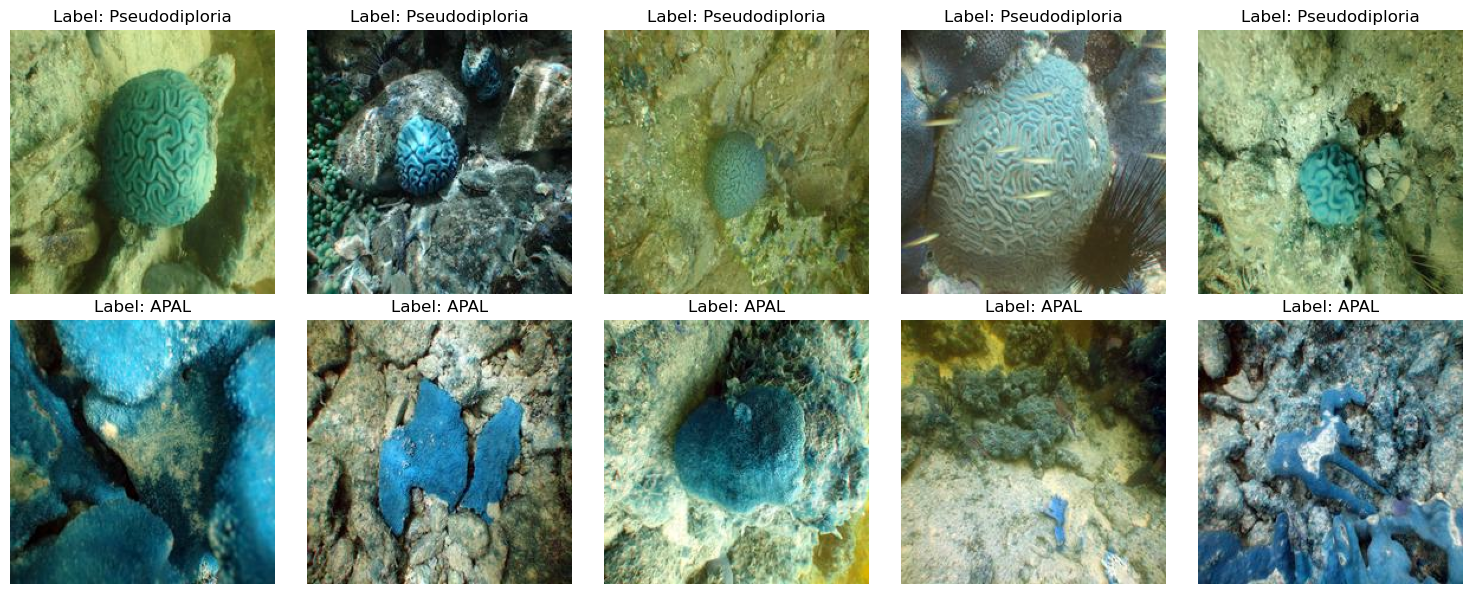

In [24]:
# Create subplots for displaying the selected test images and labels
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6))
axes = axes.ravel()

for i, class_label in enumerate(target_classes):
    for j in range(num_columns):
        # Find the indices of all samples in the test set with the target class label
        class_indices = [idx for idx, label in enumerate(y_test) if label == class_label]
        
        # Ensure we don't select more images than available
        if class_counts[class_label] < len(class_indices):
            # Get the index of the image to display
            selected_index = class_indices[class_counts[class_label]]
            
            # Display the selected test image and label
            axes[i * num_columns + j].imshow(X_test[selected_index])
            axes[i * num_columns + j].set_title(f'Label: {class_label}')
            axes[i * num_columns + j].axis("off")
            
            # Increment the count for this class
            class_counts[class_label] += 1

plt.tight_layout()
plt.show()


In [25]:
# Load your data from the pickle file
with open('../data/external/data.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

# Check the shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (719, 224, 224, 3)
y_train shape: (719,)
X_test shape: (180, 224, 224, 3)
y_test shape: (180,)
